In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras import layers

In [2]:
import pathlib
data_train = 'D:/07 Skripsi/dataset/images'

In [3]:
#image augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.1
)


In [5]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 5086 images belonging to 6 classes.
Found 563 images belonging to 6 classes.


In [7]:
from tensorflow.keras.layers import Input
model = tf.keras.models.Sequential([
    ResNet152V2(
        weights='imagenet',
        include_top=False,
        input_tensor=Input(shape=(150,150,3))
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.layers[0].trainable=False

234545216/234545216 [==============================] - 213s 1us/step


In [8]:
model.compile(
    optimizer="Adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [20]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=2
)

Epoch 1/10
80/80 - 989s - loss: 0.1862 - accuracy: 0.9353 - val_loss: 0.4827 - val_accuracy: 0.8774 - 989s/epoch - 12s/step
Epoch 2/10
80/80 - 979s - loss: 0.1865 - accuracy: 0.9363 - val_loss: 0.4323 - val_accuracy: 0.8810 - 979s/epoch - 12s/step
Epoch 3/10
80/80 - 975s - loss: 0.1689 - accuracy: 0.9446 - val_loss: 0.4427 - val_accuracy: 0.8721 - 975s/epoch - 12s/step
Epoch 4/10
80/80 - 977s - loss: 0.1839 - accuracy: 0.9426 - val_loss: 0.3397 - val_accuracy: 0.9023 - 977s/epoch - 12s/step
Epoch 5/10
80/80 - 976s - loss: 0.1527 - accuracy: 0.9459 - val_loss: 0.5927 - val_accuracy: 0.8828 - 976s/epoch - 12s/step
Epoch 6/10
80/80 - 978s - loss: 0.1391 - accuracy: 0.9528 - val_loss: 0.4094 - val_accuracy: 0.9059 - 978s/epoch - 12s/step
Epoch 7/10
80/80 - 704s - loss: 0.1160 - accuracy: 0.9583 - val_loss: 0.5550 - val_accuracy: 0.8952 - 704s/epoch - 9s/step
Epoch 8/10
80/80 - 663s - loss: 0.0910 - accuracy: 0.9693 - val_loss: 0.5264 - val_accuracy: 0.8952 - 663s/epoch - 8s/step
Epoch 9/10

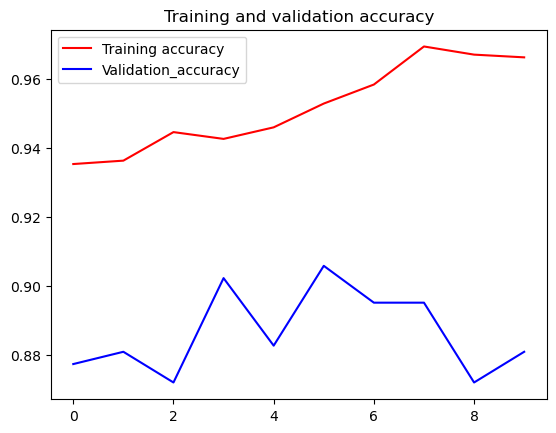

<Figure size 640x480 with 0 Axes>

In [21]:
#plot the result 
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

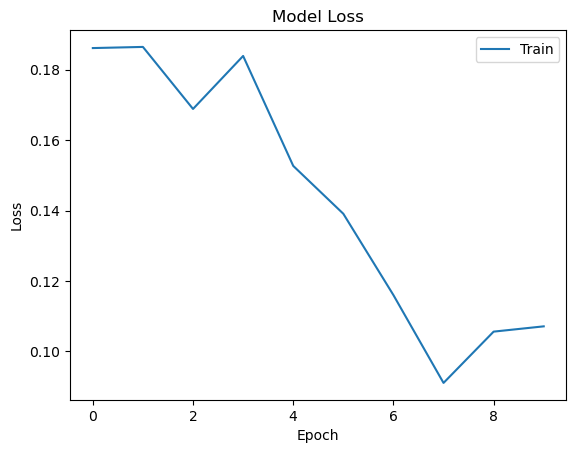

In [22]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper right')
plt.show()

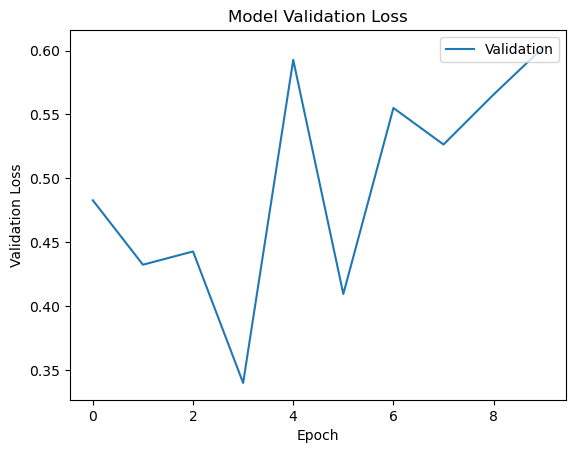

In [23]:
plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['Validation'],loc='upper right')
plt.show()

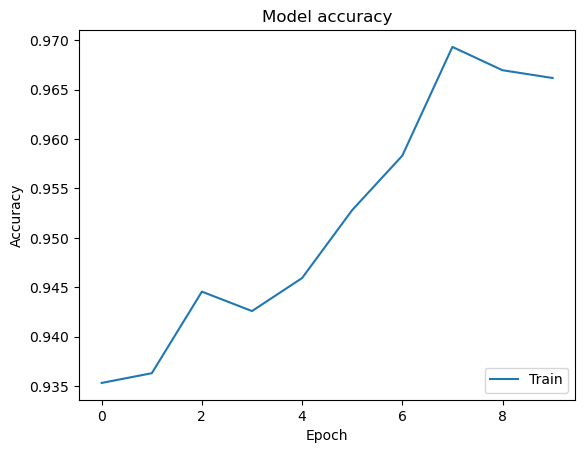

In [24]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

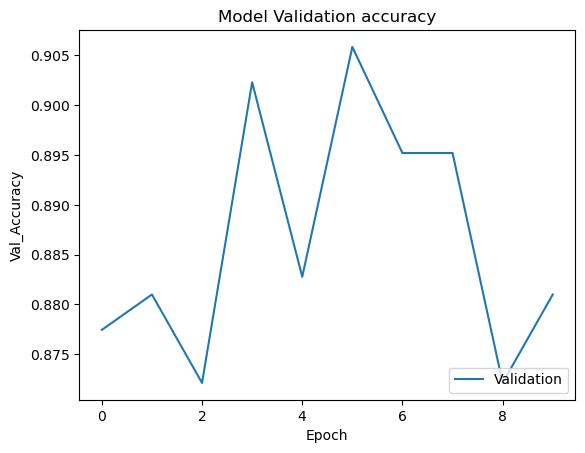

In [25]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Validation accuracy')
plt.ylabel('Val_Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='lower right')
plt.show()